# import data 

In [3]:


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
# read the csv file
df_raw = pd.read_csv('/content/drive/MyDrive/data/sdp2022/task1_train_dataset.csv')

df = df_raw.copy()
df

,index,title,first_author,description,core_id,doi,pub_year,theme
0,0,Activation of nitrofurazone by azoreductases: ...,M Nakanishi,NaN,190682983,10.1038/srep00063,2011,"Allied Health Professions, Dentistry, Nursing ..."
1,1,Organisation and delivery of home care re-able...,Allen,NaN,403149987,10.1111/j.1365-2524.2011.01010.x,2011,Social Work and Social Policy
2,2,Relationships between anthocyanins and other c...,Aurélie Bechoff,NaN,247875062,10.1016/j.foodchem.2013.09.132,2013,"Agriculture, Veterinary and Food Science"
3,3,New Insights into the Mechanisms of Water-Stre...,H. Cochard,NaN,253594132,10.1104/pp.109.138305,2009,Earth Systems and Environmental Sciences
4,4,Extensive chordate and annelid macrosynteny re...,"Hui, Jerome H.L.",Genes with the homeobox motif are crucial in d...,15139448,10.1093/molbev/msr175,2012,Biological Sciences
...,...,...,...,...,...,...,...,...
51555,51555,BALB/c mice deficient in CD4(+) T cell IL-4R a...,Bryson Karen J.,NaN,204005191,10.1371/journal.pntd.0000930,2011,"Allied Health Professions, Dentistry, Nursing ..."
51556,51556,The Afterlife of Parliamentary Sovereignty,"Barber, NW",NaN,77380845,10.1093/icon/mor023,2011,Law
51557,51557,Metabolomic Proﬁling of In Vivo Plasma Respons...,"O'Kane, Anthony A",NaN,16499864,10.1021/es305345u,2013,"Agriculture, Veterinary and Food Science"
51558,51558,Constant flux relation for diffusion-limited c...,"Connaughton, Colm","In a non-equilibrium system, a Constant Flux R...",2002669,10.1103/PhysRevE.78.041403,2008,Mathematical Sciences


# transform data

In [1]:
def nan_dect(x):
  return pd.isna(x)

# 5 Methods to Check for NaN values in in Python | by Abhijith Chandradas | Towards Data Science
# https://towardsdatascience.com/5-methods-to-check-for-nan-values-in-in-python-3f21ddd17eed

In [2]:
nan_dect(0)

NameError: ignored

In [ ]:
df['description'].apply(nan_dect).value_counts()

In [ ]:
df.info()

In [ ]:
df['description']

In [ ]:
df['description_fillna'] = df.description.fillna('')


In [ ]:
df["title_description"] = df["title"].astype(str) + '. ' + df["description_fillna"].astype(str)


In [ ]:
df["title_description"]

In [ ]:
pd.options.display.max_rows


In [ ]:
pd.options.display.max_colwidth

In [ ]:
pd.options.display.max_colwidth = 150

In [ ]:
df["title_description"]

In [ ]:
df_short = df[['title_description','theme']]
df_short

# 类别分布      

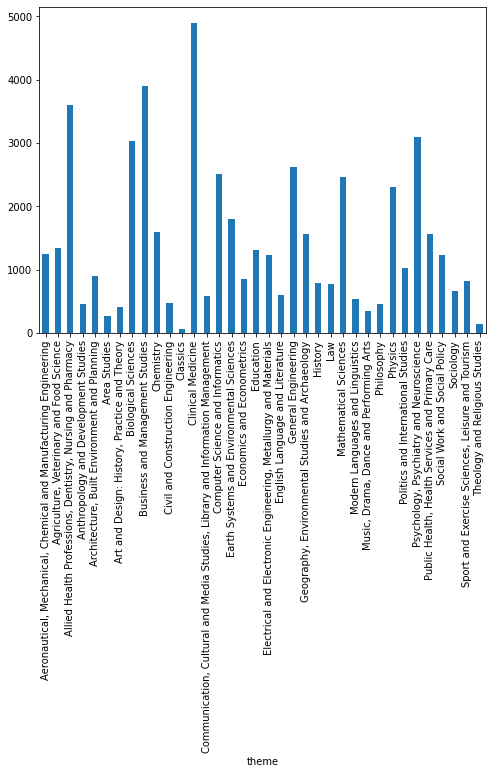

In [119]:


import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('theme').title.count().plot.bar(ylim=0)
plt.show()

#如何通过Scikit-Learn实现多类别文本分类？ | 机器之心
#https://www.jiqizhixin.com/articles/2018-03-05-3

# Get X and y


In [ ]:
X = df_short[['title_description']]
y = df_short[['theme']]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
y = le.fit_transform(df_short[['theme']])
y

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 2, 32,  1, ...,  1, 24,  2])

In [ ]:
len(y)

51560

# countvectorizer - 2000 feature

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words="english",decode_error='ignore',max_features=2000)


In [ ]:
X_counts = count_vect.fit_transform(df_short.title_description)


In [ ]:
X_counts.shape

(51560, 2000)

In [ ]:
X_counts

<51560x2000 sparse matrix of type '<class 'numpy.int64'>'
	with 966409 stored elements in Compressed Sparse Row format>

In [ ]:
X_counts[0]

<1x2000 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [ ]:

count_vect.get_feature_names()

AttributeError: ignored

In [ ]:
count_vect.vocabulary_


In [ ]:
len(count_vect.vocabulary_)

2000

In [ ]:
counts = pd.DataFrame(X_counts.toarray(),
                      columns=count_vect.get_feature_names())

counts

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,001,01,05,10,100,11,12,13,14,...,works,world,writing,year,years,yield,young,youth,zero,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51555,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51558,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X_counts

<51560x2000 sparse matrix of type '<class 'numpy.int64'>'
	with 966409 stored elements in Compressed Sparse Row format>

In [ ]:
import numpy as np

zip1 = zip(count_vect.get_feature_names(),
    np.asarray(X_counts.sum(axis=0)).ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
dict1 = dict(zip1)
dict1

In [ ]:
for k in sorted(dict1, key=dict1.get, reverse=True):
  k, dict1[k]

In [ ]:
dict1

In [ ]:
dict1['diffusion']

509

KeyError: ignored

In [ ]:
{k: dict1[k] for k in sorted(dict1, key=dict1.get, reverse=True)}

# ref
# Python 3 sort a dict by its values - Stack Overflow
# https://stackoverflow.com/questions/20944483/python-3-sort-a-dict-by-its-values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_counts, y, test_size=0.20, random_state=27)

In [ ]:
X_train

<41248x2000 sparse matrix of type '<class 'numpy.int64'>'
	with 773709 stored elements in Compressed Sparse Row format>

# classifier -knn: 0.2224 test set

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors=5)


In [ ]:
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Train set score

In [ ]:
KNN_model.score(X_train, y_train)

0.45876163692785105

In [ ]:
# Test set score

In [ ]:
y_pred_KNN=KNN_model.predict(X_test)


In [ ]:
KNN_model.score(X_test, y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(accuracy_score(y_pred_KNN, y_test))

0.22245927075252134


# naive baysian -0.4112 test set

In [91]:
from sklearn.naive_bayes import MultinomialNB
MultinomialNB = MultinomialNB()


In [84]:
X_counts

<51560x2000 sparse matrix of type '<class 'numpy.int64'>'
	with 966409 stored elements in Compressed Sparse Row format>

In [88]:
X_train

<41248x2000 sparse matrix of type '<class 'numpy.int64'>'
	with 773709 stored elements in Compressed Sparse Row format>

In [86]:
y_train

array([18,  2, 12, ..., 29,  1, 34])

In [89]:
len(y_train)

41248

In [92]:
cls = MultinomialNB.fit(X_train, y_train)

In [ ]:
# Train set score

In [93]:
MultinomialNB.score(X_train, y_train)

0.46293153607447635

In [ ]:
# Test set score

In [94]:
y_pred_KNN=MultinomialNB.predict(X_test)


In [95]:
MultinomialNB.score(X_test, y_test)

0.41126842513576417

In [96]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(accuracy_score(y_pred_KNN, y_test))

0.41126842513576417


# 5000 feature

In [97]:
df_short

,title_description,theme
0,Activation of nitrofurazone by azoreductases: multiple activities in one enzyme.,"Allied Health Professions, Dentistry, Nursing and Pharmacy"
1,Organisation and delivery of home care re-ablement : what makes a difference?.,Social Work and Social Policy
2,Relationships between anthocyanins and other compounds and sensory acceptability of Hibiscus drinks.,"Agriculture, Veterinary and Food Science"
3,New Insights into the Mechanisms of Water-Stress-Induced Cavitation in Conifers.,Earth Systems and Environmental Sciences
4,Extensive chordate and annelid macrosynteny reveals ancestral homeobox gene organization. Genes with the homeobox motif are crucial in development...,Biological Sciences
...,...,...
51555,BALB/c mice deficient in CD4(+) T cell IL-4R alpha expression control Leishmania mexicana load although female but not male mice develop a healer ...,"Allied Health Professions, Dentistry, Nursing and Pharmacy"
51556,The Afterlife of Parliamentary Sovereignty.,Law
51557,Metabolomic Proﬁling of In Vivo Plasma Responses to DioxinAssociated Dietary Contaminant Exposure in Rats: Implications for Identiﬁcation of Sourc...,"Agriculture, Veterinary and Food Science"
51558,"Constant flux relation for diffusion-limited cluster-cluster aggregation. In a non-equilibrium system, a Constant Flux Relation (CFR) expresses th...",Mathematical Sciences


In [ ]:

# count vecterizer 


In [99]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect_5000 = CountVectorizer(stop_words="english",decode_error='ignore',max_features=5000)


In [101]:
X_counts_5000 = count_vect_5000.fit_transform(df_short.title_description)


In [102]:
X_counts_5000

<51560x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 1253358 stored elements in Compressed Sparse Row format>

In [103]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [104]:
y = le.fit_transform(df_short[['theme']])
y

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 2, 32,  1, ...,  1, 24,  2])

# split

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_counts, y, test_size=0.20, random_state=27)

In [106]:
X_train

<41248x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 1003790 stored elements in Compressed Sparse Row format>

In [107]:
y_train

array([18,  2, 12, ..., 29,  1, 34])

In [108]:
len(y_train)

41248

# classifier -knn: 0.1956 test set

In [109]:
from sklearn.neighbors import KNeighborsClassifier


In [110]:
KNN_model = KNeighborsClassifier(n_neighbors=5)


In [111]:
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [112]:
# Train set score

In [113]:
KNN_model.score(X_train, y_train)

0.45944045771916214

In [114]:
# Test set score

In [115]:
y_pred_KNN=KNN_model.predict(X_test)


In [116]:
KNN_model.score(X_test, y_test)

0.1956943366951125

In [117]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(accuracy_score(y_pred_KNN, y_test))

0.1956943366951125


# tf-idf 2000

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english',max_features=2000)



In [18]:
features = tfidf.fit_transform(df_short.title_description).toarray()


In [33]:
tfidf.get_feature_names_out()

array(['000', '001', '01', ..., 'young people', 'zero', 'zone'],
      dtype=object)

In [19]:
df_short

,title_description,theme
0,Activation of nitrofurazone by azoreductases: multiple activities in one enzyme.,"Allied Health Professions, Dentistry, Nursing and Pharmacy"
1,Organisation and delivery of home care re-ablement : what makes a difference?.,Social Work and Social Policy
2,Relationships between anthocyanins and other compounds and sensory acceptability of Hibiscus drinks.,"Agriculture, Veterinary and Food Science"
3,New Insights into the Mechanisms of Water-Stress-Induced Cavitation in Conifers.,Earth Systems and Environmental Sciences
4,Extensive chordate and annelid macrosynteny reveals ancestral homeobox gene organization. Genes with the homeobox motif are crucial in development...,Biological Sciences
...,...,...
51555,BALB/c mice deficient in CD4(+) T cell IL-4R alpha expression control Leishmania mexicana load although female but not male mice develop a healer ...,"Allied Health Professions, Dentistry, Nursing and Pharmacy"
51556,The Afterlife of Parliamentary Sovereignty.,Law
51557,Metabolomic Proﬁling of In Vivo Plasma Responses to DioxinAssociated Dietary Contaminant Exposure in Rats: Implications for Identiﬁcation of Sourc...,"Agriculture, Veterinary and Food Science"
51558,"Constant flux relation for diffusion-limited cluster-cluster aggregation. In a non-equilibrium system, a Constant Flux Relation (CFR) expresses th...",Mathematical Sciences


In [20]:
features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
features.shape

(51560, 2000)

In [22]:
y = df_short[['theme']]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df_short[['theme']])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:

y

array([ 2, 32,  1, ...,  1, 24,  2])

# split

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.20, random_state=27)

In [25]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
y_train

array([18,  2, 12, ..., 29,  1, 34])

In [27]:
len(y_train)

41248

# classifier -knn: 0.13 test set

In [28]:
from sklearn.neighbors import KNeighborsClassifier


In [30]:
KNN_model = KNeighborsClassifier(n_neighbors=5)


In [31]:
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Train set score

In [32]:
KNN_model.score(X_train, y_train)

0.4045771916214119

In [ ]:
# Test set score

In [34]:
y_pred_KNN=KNN_model.predict(X_test)


In [35]:
KNN_model.score(X_test, y_test)

0.13081846392552365

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(accuracy_score(y_pred_KNN, y_test))

0.13081846392552365


# tf-idf 5000m

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_5000 = TfidfVectorizer(sublinear_tf=True,  ngram_range=(1, 2), stop_words='english',max_features=5000)


In [49]:
X_5000 = tfidf_5000.fit_transform(df_short['title_description'])


In [50]:
X_5000

<51560x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 1272970 stored elements in Compressed Sparse Row format>

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_5000, y, test_size=0.20, random_state=27)

In [52]:
X_train

<41248x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 1019517 stored elements in Compressed Sparse Row format>

# classifier -knn: 0.07 test set

In [53]:
from sklearn.neighbors import KNeighborsClassifier


In [54]:
KNN_model = KNeighborsClassifier(n_neighbors=5)


In [55]:
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [56]:
# Train set score

In [57]:
KNN_model.score(X_train, y_train)

0.3679208688906129

In [58]:
# Test set score

In [59]:
y_pred_KNN=KNN_model.predict(X_test)


In [60]:
KNN_model.score(X_test, y_test)

0.07680372381691233

In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(accuracy_score(y_pred_KNN, y_test))

0.07680372381691233
